In [1]:
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt
%matplotlib inline 
#permite que le coloquemos ; en vez de show()
import seaborn as sns 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("customer_data.csv")
data.head(2)

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [8]:
escalador = MinMaxScaler()
data_escalada = escalador.fit_transform(data[["Edad","Ingresos Anuales (k$)","Puntuación de Gasto (1-100)"]])
data_escalada

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

In [9]:
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(data_escalada)

In [10]:
U, sigma, VT = np.linalg.svd(data_escalada)

In [12]:
k=2
svd_resultados=U[:,:k]* sigma[:k]

In [13]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_clusters = kmeans.fit_predict(data_escalada)

C:\Users\cafef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
linked = linkage(data_escalada, method="ward")

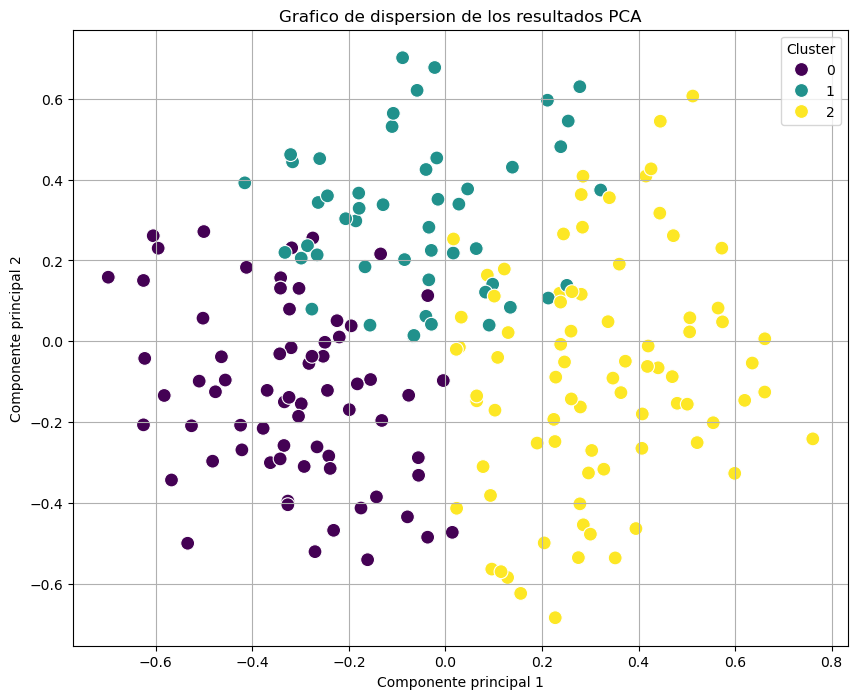

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_resultados[:,0],y=pca_resultados[:,1],hue=kmeans_clusters,
               palette="viridis",s=100)

plt.title("Grafico de dispersion de los resultados PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Cluster")
plt.grid(True);

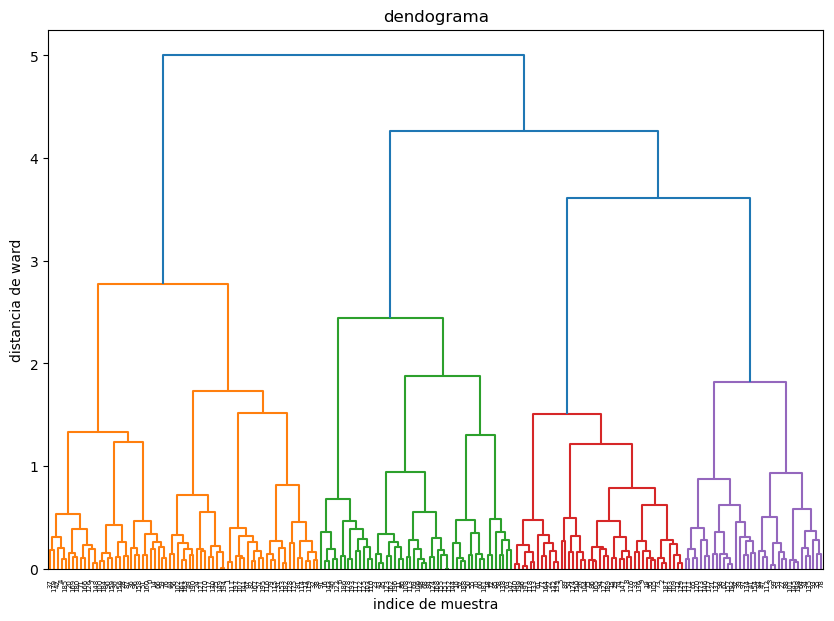

In [17]:
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title("dendograma")
plt.xlabel("indice de muestra")
plt.ylabel("distancia de ward")
plt.axhline(y=10, color="r",linestyle='--');

In [22]:
print("analisis de cluster para determinar estrategias")
print("----------------------------------------------------")
cluster_info = pd.DataFrame({
    'Cluster':kmeans_clusters,
    'Edad':data['Edad'],
    'Ingresos':data['Ingresos Anuales (k$)'],
    'Gasto':data['Puntuación de Gasto (1-100)']})

print("descripcion de cada cluster")
print("----------------------------------------------------")
for cluster in cluster_info['Cluster'].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]
    print(f"Cluster {cluster}: ")
    print(f"Edad Media: {cluster_data['Edad'].mean():.0f}")
    print(f"Ingresos Medios: {cluster_data['Ingresos'].mean():.2f}")
    print(f"Puntuacion de gasto media: {cluster_data['Gasto'].mean():.2f}")
    
    

analisis de cluster para determinar estrategias
----------------------------------------------------
descripcion de cada cluster
----------------------------------------------------
Cluster 2: 
Edad Media: 50
Ingresos Medios: 97.33
Puntuacion de gasto media: 62.00
Cluster 0: 
Edad Media: 43
Ingresos Medios: 52.51
Puntuacion de gasto media: 20.17
Cluster 1: 
Edad Media: 34
Ingresos Medios: 49.08
Puntuacion de gasto media: 72.20
